In [9]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
def function_part1():
  index = list(random.randint(1,60000) for i in range(4))
  plt.figure()
  f, axarr = plt.subplots(2,2) 
  axarr[0][0].imshow(x_train[index[0]])
  axarr[1][0].imshow(x_train[index[1]])
  axarr[0][1].imshow(x_train[index[2]])
  axarr[1][1].imshow(x_train[index[3]])

<Figure size 432x288 with 0 Axes>

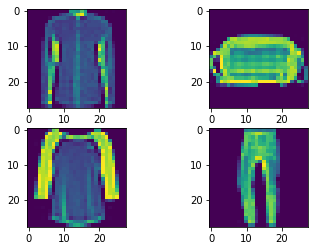

In [12]:
function_part1()

In [13]:
layer_input= np.zeros(28*28)
layer_hidden01 = np.zeros(64)
layer_hidden02 = np.zeros(128)
layer_output = np.zeros(10)

weight_input_hidden01= np.random.normal(size=(28*28 , 64))
bias_input_hidden01= np.random.normal(size=(64))

weight_input_hidden02= np.random.normal(size=(64 , 128))
bias_input_hidden02= np.random.normal(size=(128))

weight_input_output= np.random.normal(size=(128 , 10))
bias_input_output= np.random.normal(size=(10))

In [14]:
# calculate activitation function
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [15]:
# calculate Derivative ctivitation function
def dev_sigmoid(X):
     return sigmoid(X)*(1-sigmoid(X))

In [16]:
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])

In [47]:
# layer_hidden01=[]
# layer_hidden01_act_fun = []
# layer_hidden02 = []
# layer_hidden02_act_fun = []
# layer_output = []
# layer_output_act_fun = []
# layer_output_softmax = []

In [60]:
def forward(x):
        # perform a forward pass of the network and return the result
        # remember to retain the value of each node (i.e. layer_hidden01_forward)
        # in order to use in backpropagation
        # Use whatever activation function you wish for the first layer,
        # and softmax activation for the output layer
        global layer_hidden01,layer_hidden01_act_fun ,layer_hidden02 ,layer_hidden02_act_fun ,layer_output,layer_output_act_fun ,layer_output_softmax

        layer_hidden01 = np.matmul(x, weight_input_hidden01) + bias_input_hidden01 
        layer_hidden01_act_fun = sigmoid(layer_hidden01) 


        layer_hidden02 = np.matmul(layer_hidden01_act_fun, weight_input_hidden02) + bias_input_hidden02 
        layer_hidden02_act_fun = sigmoid(layer_hidden02) 

        layer_output = np.matmul(layer_hidden02_act_fun , weight_input_output ) + bias_input_output
        layer_output_act_fun = sigmoid(layer_output)

        layer_output_softmax = np.exp(layer_output_act_fun) / np.sum(np.exp(layer_output_act_fun), axis=1).reshape(x.shape[0],1) # output with softmax

        return layer_output_softmax

def backward(y):
        # perform backpropagation on the loss value and compute the gradient
        # w.r.t. every element of the network and retain them (i.e. weight_input_hidden01_backward)
        # don't forget to consider the regularization
        
        one_hot = np.zeros((y.size, 10))
        one_hot[np.arange(y.size), y] = 1
        layer_output_backward = layer_output_softmax - one_hot

        weight_input_output_backward = np.matmul(layer_hidden02_act_fun.T , layer_output_backward)
        bias_input_output_backward = np.sum(layer_output_backward, axis=0)
        print(layer_hidden01_act_fun.shape , weight_input_output_backward.shape)
        
        weight_input_hidden02_backward = np.matmul(layer_hidden01_act_fun.T , dev_sigmoid(weight_input_output_backward))
        bias_input_hidden02_backward = np.sum(layer_output_backward, axis=0)  

        layer_hidden01_a_backward = np.matmul(x.T , dev_sigmoid(weight_input_hidden02_backward))
        bias_input_hidden01_backward = np.sum(layer_output_backward, axis=0)  

       # layer_hidden01_backward =  (np.where(layer_hidden01 > 0 , layer_hidden01_a_backward, np.zeros_like(layer_hidden01_a_backward)

        # #print(layer_hidden01_a_backward)
        # bias_input_hidden01_backward = np.sum(layer_hidden01_backward, axis=0)
       # weight_input_hidden01_backward = np.matmul(x.T, layer_hidden01_backward)

def step(lr, lam):
        # simply update all the weights using the gradinets computed in backward
        # and the given learning rate with SGD
        weight_input_hidden01 -= lr*(weight_input_hidden01_backward + 2 * lam * weight_input_hidden01)
        bias_input_hidden01 -= lr*(bias_input_hidden01_backward + 2 * lam * bias_input_hidden01)
        weight_input_hidden02 -= lr*(weight_input_hidden02_backward + 2 * lam * weight_input_hidden02)
        bias_input_hidden02 -= lr*(bias_input_hidden02_backward + 2 * lam * bias_input_hidden02)

In [61]:
for i in range (2):
  layer_output_softmax = forward(x_train[1].reshape(1 ,28*28))
  backward(y_train[1])
  step(0.5,0.5)


(1, 64) (128, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored